# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

# Assingment 4
------

## Import Datasets
For this assingment, the data to elaborate the visualizations are extracted from 3 datasets available in Kaggle.
- **Dataset 1 - GDP:** [GDP annual growth from different countries (1960-2020)](https://www.kaggle.com/zackerym/gdp-annual-growth-for-each-country-1960-2020?select=GDP_annual_growth_NEW.csv)
- **Dataset 2 - Sugar:** [Sugar world production, consumption and trade](https://www.kaggle.com/kkhandekar/sugar-world-production-consumption-and-trade?select=Sugar_World-MarketTrade.xlsx)

In [67]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.cm import ScalarMappable

### Context - GDP Dataframe
This dataset contains annual GDP growth for each country.
Contains data about 264 countries (some missing data).

**Column names and description:**
- Country Name - name of country
- Country Code - code of country (3 letters)
- Indicator Name - all fields filled with 'GDP (current US$)'
- Indicator Code - all fields contains 'NY.GDP.MKTP.CD' value
- Colums for each year (1960 - 2020)

----------------------------

### Context - Sugar Dataframe
This dataset contains sugar consumption in 1000 metric tons for each country.
Contains data about 25 countries (no missing data).

**Column names and description:**
- Country - name of country
- Colums for each year (2016 - 2021) that stores the amount of sugar consumption in 1000 metric tons for within a specific year of each country

------

In [2]:
# GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus
# any product taxes and minus any subsidies not included in the value of the products.
df_gdp = pd.read_csv("GDP_annual_growth_NEW.csv")

# Sugar consumption in different countries, units: 1,000 Metric Tons, Raw Value
df_sugar = pd.read_excel("Sugar_World-MarketTrade.xlsx", sheet_name='Cons')

In [3]:
print("- GDP DF:")
print(sorted([country.strip() for country in df_gdp['Country Name'] if country in list(df_sugar['Country'])]))
print(len(sorted([country.strip() for country in df_gdp['Country Name'] if country in list(df_sugar['Country'])])), 
     'unique country names')
print()
print("- Sugar DF:")
print(sorted(df_sugar['Country']))
print(len(sorted(df_sugar['Country'])), 'unique country names')


- GDP DF:
['Algeria', 'Bangladesh', 'Brazil', 'China', 'Colombia', 'European Union', 'India', 'Indonesia', 'Japan', 'Malaysia', 'Mexico', 'Nigeria', 'Pakistan', 'Philippines', 'South Africa', 'Sudan', 'Thailand', 'Turkey', 'United Kingdom', 'United States', 'Vietnam']
21 unique country names

- Sugar DF:
['Algeria', 'Bangladesh', 'Brazil', 'China', 'Colombia', 'Egypt', 'European Union', 'India', 'Indonesia', 'Iran', 'Japan', 'Malaysia', 'Mexico', 'Nigeria', 'Pakistan', 'Philippines', 'Russia', 'South Africa', 'South Korea', 'Sudan', 'Thailand', 'Turkey', 'United Kingdom', 'United States', 'Vietnam']
25 unique country names


---------------
**Obs 01: Problem & Possible Solution - Country names missing**

There are 4 country names that are present in `sugar_df` that are not present in the list of names extracted from `gdp_df`. These countries are the following:
- Egypt
- Iran  
- Russia 
- South Korea

The way to solve this problem is as follows, since there are only 4 problematic country names, we are going to hard code the search of these countries if they exist in `gdp_df`, if not, these countries are going to be deleted from the `sugar_df`.

---------------
**Investigation Results**

- `sugar_df` country name - Egypt: `gdp_df` country name - Egypt, Arab Rep.
- `sugar_df` country name - Iran: `gdp_df` country name - Iran, Islamic Rep.
- `sugar_df` country name - Russia: `gdp_df` country name - Russian Federation
- `sugar_df` country name - Sounth Korea does not exist in the `gdp_df` so it's going to be excluded of the chart

-------
**Conclusion**

Only keep these country names, and drop _South Korea_
- Egypt
- Iran
- Russia

**These means that the final plot will consider 24 countries**

**The next step is to include those variables and later merge both dataframes**

-----

In [4]:
# Replace the country names values in the GDP df
df_gdp['Country Name'] = df_gdp['Country Name'].replace({'Egypt, Arab Rep.': 'Egypt', 
                           'Iran, Islamic Rep.': 'Iran',
                           'Russian Federation': 'Russia'})

# Drop 'South Korea' from SUGAR df
df_sugar.drop(df_sugar.loc[df_sugar['Country'] == 'South Korea'].index, inplace=True)

In [5]:
# Change the column names of SUGAR DF because the years in both Dataframes are the same
df_sugar.columns = [str('Sugar cons') + ' ' + str(col) if (len(str(col)) == 4) else col for col in df_sugar.columns]

# Add gdp to the year name columns in the GDP DF 
df_gdp.columns = [str('GDP') + ' ' + str(col) if (len(str(col)) == 4) else col for col in df_gdp.columns]

In [6]:
# Merge both dataframes on the same column names
merged_df = pd.merge(left=df_sugar, right=df_gdp, how='inner', left_on='Country' , right_on='Country Name')

# Drop not usefull columns (repeated or with no info)
merged_df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 65'],
              inplace=True)

Now that we have the merged dataframes that contains all the usefull data to create the plot, the next step is to check for null values, determine how many they are and if there are present, see what to do with them.

- No `NaN` values in the GDP from the year 1990 - 2020 
 - **HINT:** *merged_df.iloc[:, -31:]*
 
 
- No `NaN` values in the Sugar consumption from 2016 - 2021
 - **HINT:** *merged_df.iloc[:, 1:7]*
 
-----

**Solution to `NaN` Values present in the Merged DataFrame**

As it's shown in the lines above, there are no `NaN` values present in the dataframe within the slices of the dataframes just mention. So, the plan is to choose all the data from Sugar consumption from 2016 till 2016 for every country, and also, use the GDP from the year 1990 till 2020 for every country.

-----

In [7]:
# Create a list that only contains the desired columns
merged_sugar_2016_2020_cols = list(merged_df.iloc[:, 1:7])
merged_gdp_1990_2020_cols = list(merged_df.iloc[:, -31:].columns)

# Append elements from GDP to Sugar list
for element in merged_gdp_1990_2020_cols:
    merged_sugar_2016_2020_cols.append(element)

# Mask that contains all the important columns from the merged_df
merged_df_mask = merged_sugar_2016_2020_cols

# Set the Country name as the index
merged_df.set_index('Country', inplace=True)

In [23]:
# Create column that holds the AVG value from the Consumption of Sugar from 2016 - 2021 for every country
sugar_cons_cols = list(merged_df.columns[:6])

# Create column that holds the AVG value from the GDP from 1990 - 2020 for every country
gdp_cols = list(merged_df.columns[36:])

# Sugar Mean
merged_df['Sugar Cons Mean 2016-2021'] = merged_df[sugar_cons_cols].mean(axis=1)
# Sugar Standard Error
merged_df['Sugar Cons Std Error 2016-2021'] = merged_df[sugar_cons_cols].std(axis=1) / np.sqrt(len(sugar_cons_cols))

# GDP Mean
merged_df['GDP Mean 1990-2020'] = merged_df[gdp_cols].mean(axis=1)
# Sugar Standard Error
merged_df['GDP Std Error 1990-2020'] = merged_df[gdp_cols].std(axis=1) / np.sqrt(len(gdp_cols))

# Final Dataframe ready to create the horizontal bar chart
final_df = merged_df.iloc[:, -4:]

# Sort the dataframe by the GDP mean values
final_df.sort_values(by='GDP Mean 1990-2020', ascending=True, inplace=True)

<IPython.core.display.Javascript object>


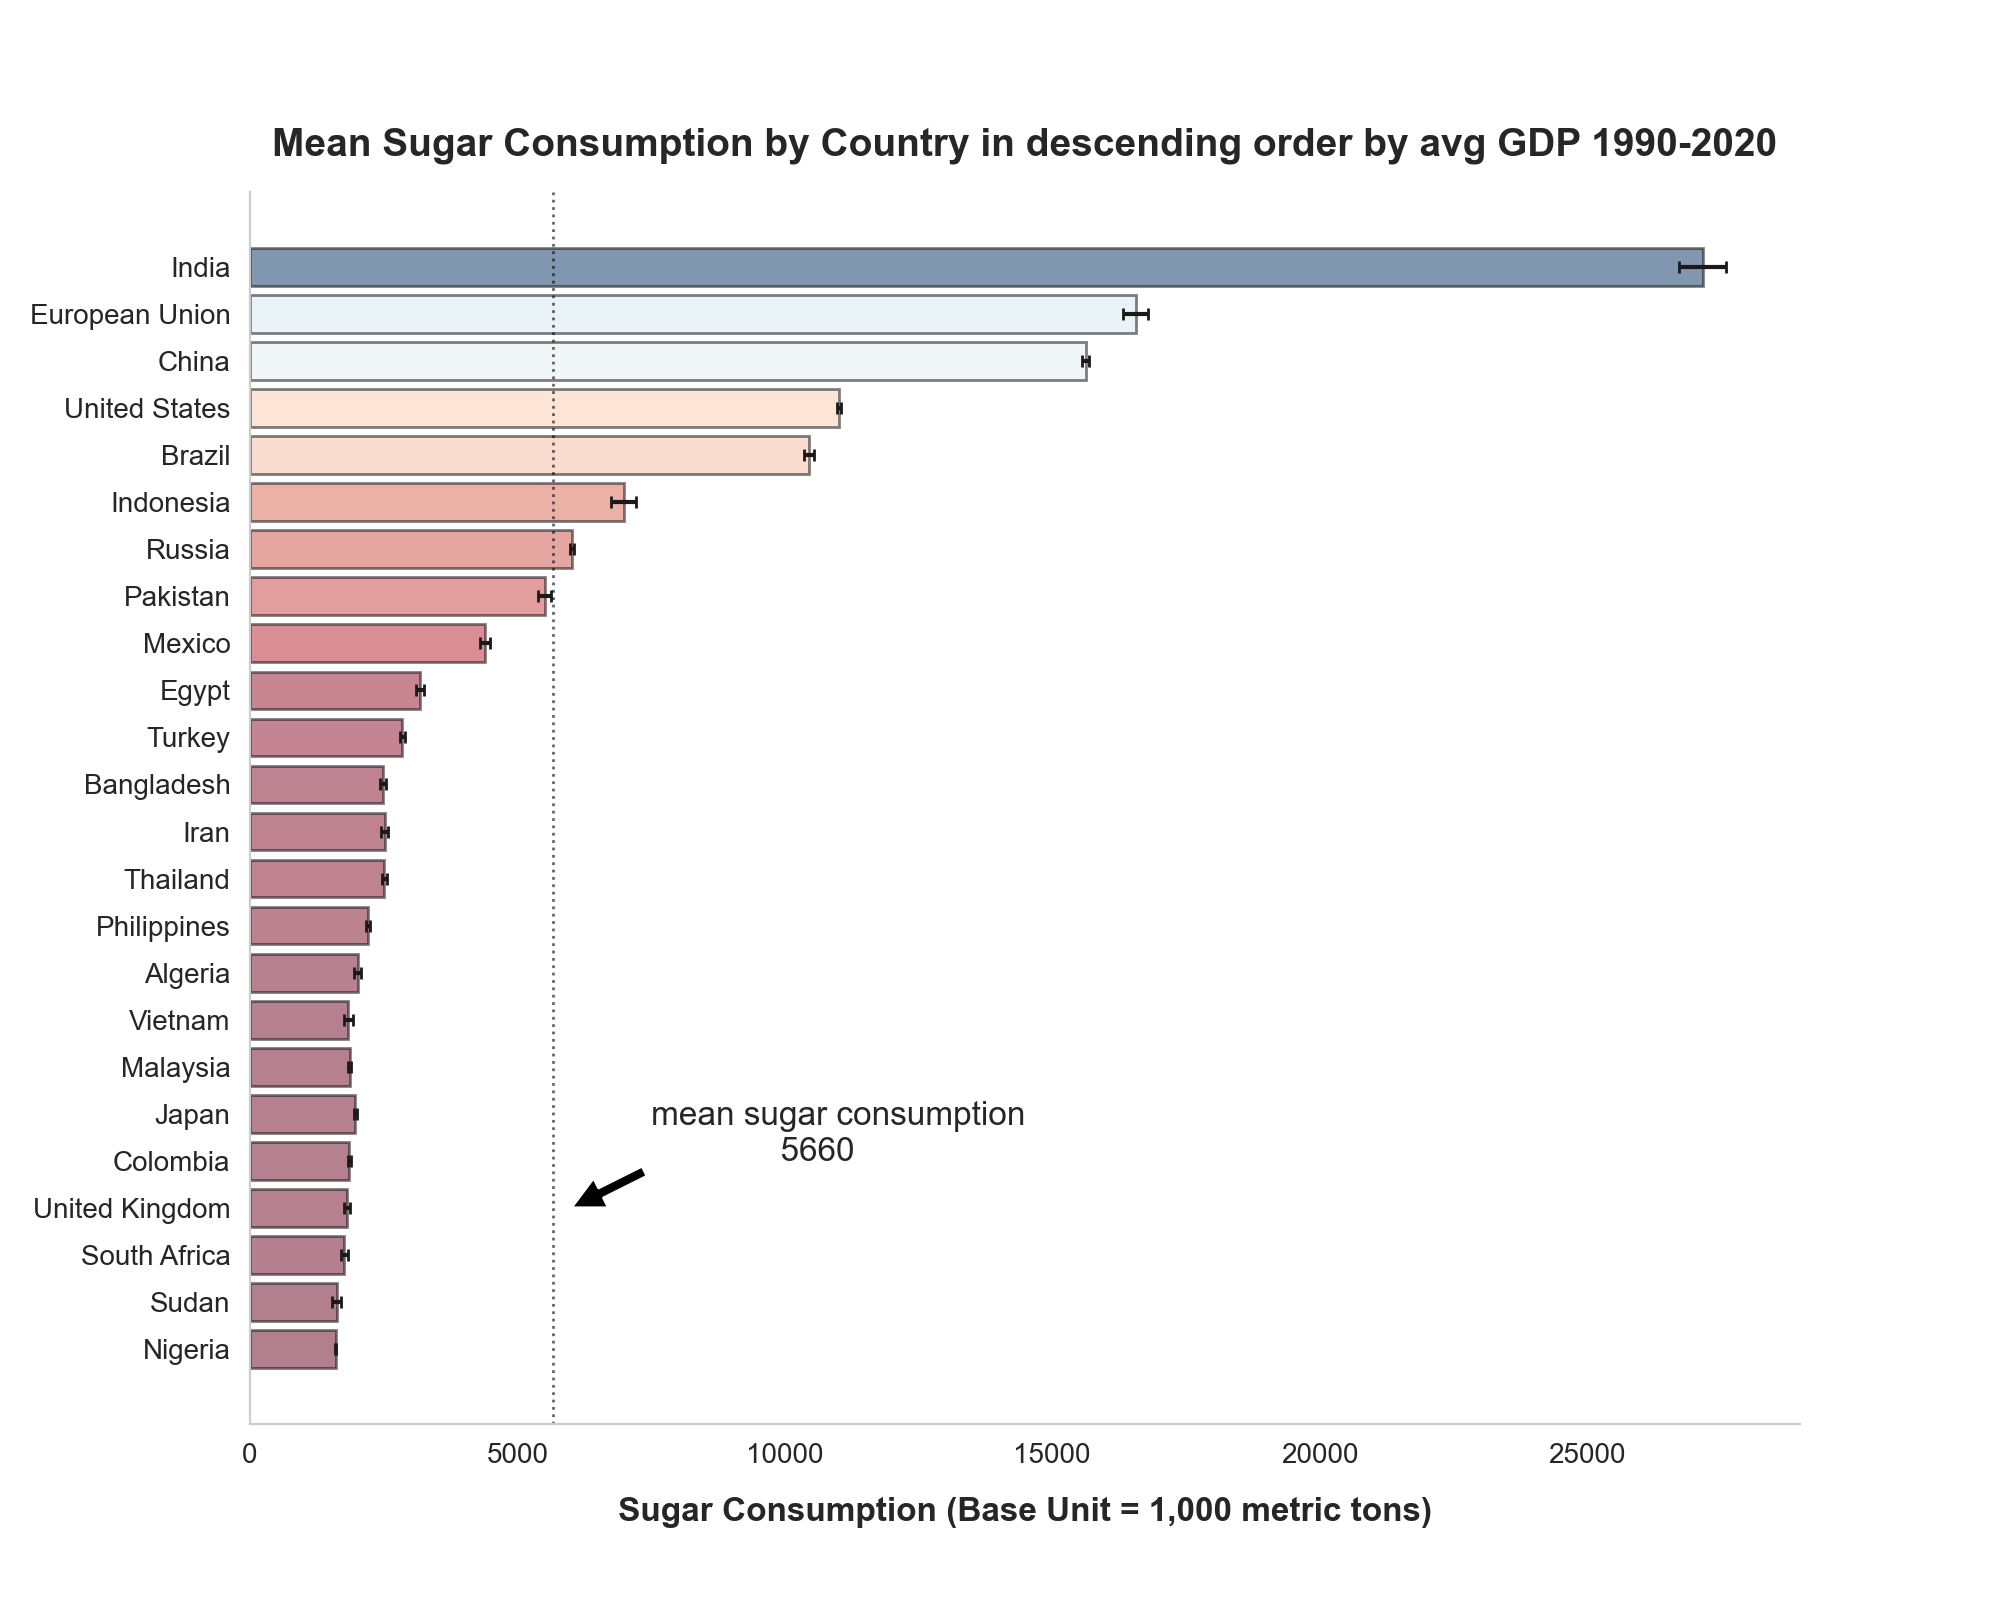

In [208]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(10,8))

# Set the color and rescale the colors
my_cmap = plt.get_cmap("RdBu")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.barh(final_df.index, final_df['Sugar Cons Mean 2016-2021'], edgecolor='black',
         xerr=final_df['Sugar Cons Std Error 2016-2021'], capsize=2, alpha=0.5, 
         color=my_cmap(rescale(final_df['Sugar Cons Mean 2016-2021'])))

ax.spines.get('top').set_visible(False)
ax.spines.get('right').set_visible(False)

ax.set_title('Mean Sugar Consumption by Country in descending order by avg GDP 1990-2020',
             fontsize=14, pad=13, fontweight='bold')
plt.xlabel('Sugar Consumption (Base Unit = 1,000 metric tons)', labelpad=10, fontweight='bold', fontsize=12)
plt.axvline(np.mean(final_df['Sugar Cons Mean 2016-2021']), color='black', linestyle='dotted', linewidth=1, alpha=.6)

mean_sugar = round(np.mean(final_df['Sugar Cons Mean 2016-2021']))
ax.annotate(f'mean sugar consumption\n              {mean_sugar}',
            xy=(6000, 3), xytext=(7500, 4), fontsize=12, arrowprops=dict(facecolor='black', shrink=0.005))

plt.grid(None)
plt.savefig('assingment4.png', dpi=300, bbox_inches='tight')


plt.show()